In [14]:
import numpy as np
import scipy.integrate as integrate
from scipy.integrate import ode

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook
%config InlineBackend.figure_format='retina'

In [15]:
def lorentzC(t,R):
    x, y, z    = R[0], R[1], R[2] # retrieve cartesian positions,
    vx, vy, vz = R[3], R[4], R[5] # velocities.
    
    r  = np.sqrt(x**2+y**2+z**2)
    if r < re:
        return np.array([0,0,0,
                     0,
                     0,
                     0])
    
    bx = 3*M*((x*z)/r**5)         # cartesian dipole components.
    by = 3*M*((y*z)/r**5)
    bz = M*((3*z**2-r**2)/r**5)

    return np.array([vx,vy,vz,
                     gyr*(vy*bz-vz*by),       # (v x B)xhat
                     gyr*(vz*bx-vx*bz),       # (v x B)yhat
                     gyr*(vx*by-vy*bx)])      # (v x B)zhat

In [16]:
re = (6.957*10**8)

In [17]:
def randstart(N):
    randy = (np.random.random(N)*4*re)-4*re/2
    randz = (np.random.random(N)*4*re)-4*re/2

    randvx = np.random.normal(loc=-5e5,scale=2.5e5/2,size=N)
    randvy = np.random.normal(loc=-5e5/1e4,scale=2.5e5/10,size=N) # pseudo earth rotation
    randvz = np.random.normal(loc=0,scale=2.5e5/20,size=N) # other magnetic fields

    x0 = []
    for i,item in enumerate(randy):
        x0.append([1.5*re, randy[i], randz[i]])

    v0 = []
    for i,item in enumerate(randvx):
        v0.append([randvx[i], randvy[i], randvz[i]])
    return x0,v0

In [18]:
dt = 1e-3
t  = np.arange(0.0, 1, dt)
t0 = 0

gyr = -1.759e11; M = -8e18;# M = -1.5e13; M = -9.7e27; -31000*1e-9*re**3

In [107]:
x0,v0 = randstart(50)

In [108]:
solver = ode(lorentzC).set_integrator('vode') # Implements an explicit runge-kutta order (4).

In [109]:
M = -13e13;

In [110]:
gyr = -1.759e10;

In [111]:
# assuming scattering probability is uniform in θ.
def random_unit_vector(num):
    arr = np.random.normal(size=num*3).reshape((num,3))
    arr /= np.linalg.norm(arr,axis=1)[:,np.newaxis]
    return arr[0]

<IPython.core.display.Javascript object>


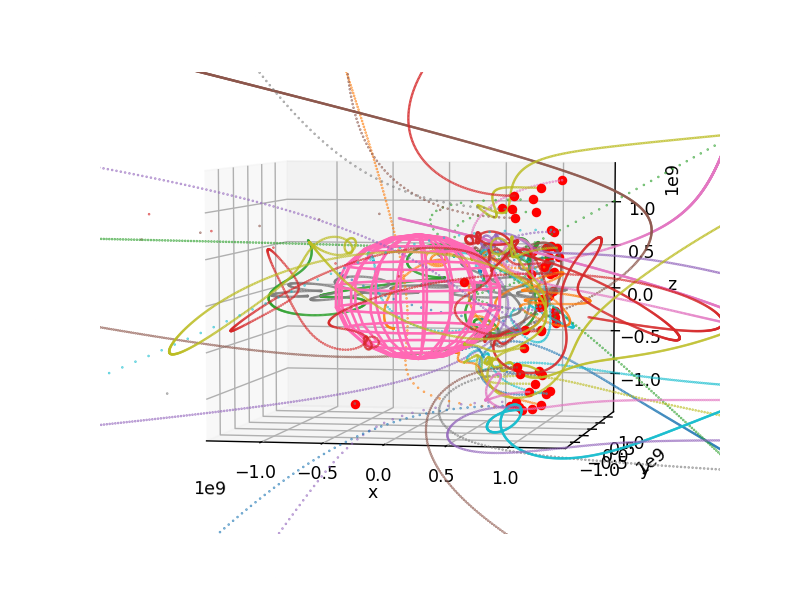

In [119]:
%matplotlib notebook
%matplotlib notebook

posList = []
for index, particle in enumerate(x0):
    initial_conditions = np.concatenate((x0[index], v0[index]))
    solver.set_initial_value(initial_conditions, t0)

    positions = []
    tf = 5e4
    dt = 5e1

    # Iterate through scipy's ode solver --> tf.
    while solver.successful() and solver.t < tf:
        # create random unit vector -> scale up by some amount (~1% of total energy?). 
        # subtract amt. from current velocities to simulate energy losses.
        lx,ly,lz = random_unit_vector(1)
        solver.y[3] /= (1+lx)
        solver.y[4] /= (1+ly)
        solver.y[5] /= (1+lz)
        solver.integrate(solver.t+dt)
        positions.append(solver.y[:6]) # keep only pos (position and velocity?)!


    positions = np.array(positions)
    posList.append(positions)
    
    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') # initialize a 3-D plot.

for positions in posList:
    cart = np.array(positions[:,:3])
    cartvel = np.array(positions[:,3:6])

    ax.scatter3D(cart.T[0], cart.T[1], cart.T[2],alpha=0.75,s=0.2)
    ax.scatter3D(cart.T[0][0],cart.T[1][0],cart.T[2][0],color='red')

plt.xlabel('x')
plt.ylabel('y')
ax.set_zlabel('z')

c = 2*re;
plt.xlim(-c,c)
plt.ylim(-c,c)
ax.set_zlim(-c,c)

# draw sphere
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = re*np.cos(u)*np.sin(v)
y = re*np.sin(u)*np.sin(v)
z = re*np.cos(v)
ax.plot_wireframe(x, y, z, color="hotpink")

<IPython.core.display.Javascript object>


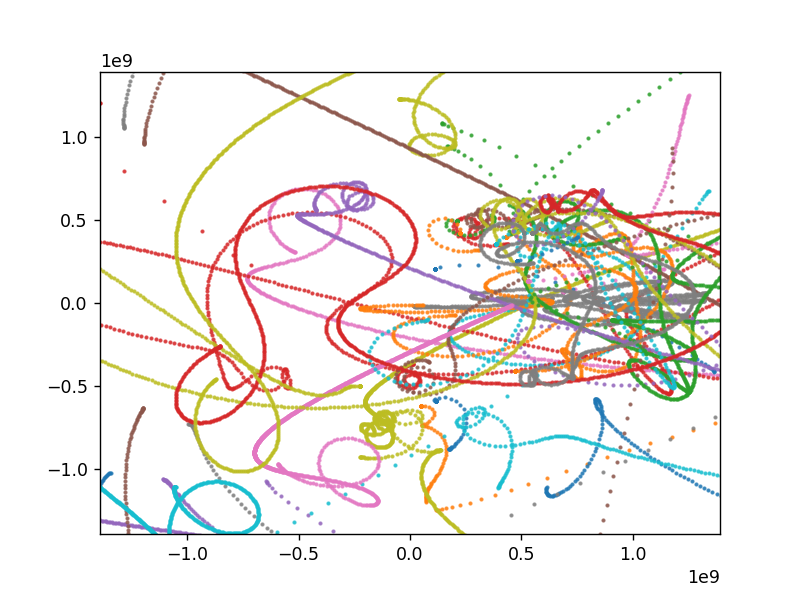

(-1391400000.0, 1391400000.0)

In [120]:
%matplotlib notebook
%matplotlib notebook
fig = plt.figure()

for positions in posList:
    cart = np.array(positions[:,:3])
    cartvel = np.array(positions[:,3:6])
    plt.scatter(cart.T[1], cart.T[2],alpha=0.75,s=2)
    
c = 2*re;
plt.xlim(-c,c)
plt.ylim(-c,c)

# Certainly makes for some cool modern art!

In [ ]:
# %matplotlib notebook
# %matplotlib notebook

# posList = []
# for index, particle in enumerate(x0):
#     initial_conditions = np.concatenate((x0[index], v0[index]))
#     solver.set_initial_value(initial_conditions, t0)

#     positions = []
#     tf = 8e4
#     dt = 5e1

#     # Iterate through scipy's ode solver --> tf.
#     while solver.successful() and solver.t < tf:
#         # create random unit vector -> scale up by some amount (~1% of total energy?). 
#         # subtract amt. from current velocities to simulate energy losses.
#         lx,ly,lz = abs(random_unit_vector(1))
#         lx /=100; ly/=100; lz/=100;

#         x,y,z    = solver.y[:3];
#         vx,vy,vz = solver.y[3:6];
#         solver.set_initial_value([x,y,z,vx/(1+lx),vy/(1+ly),vz/(1+lz)], solver.t+dt) 
#         # modify the velocities to emulate energy injection
        
#         solver.integrate(solver.t+dt)
#         positions.append(solver.y[:6]) # keep only pos (position and velocity?)!


#     positions = np.array(positions)
#     posList.append(positions)
    
    
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d') # initialize a 3-D plot.

# for positions in posList:
#     cart = np.array(positions[:,:3])
#     cartvel = np.array(positions[:,3:6])

#     ax.scatter3D(cart.T[0], cart.T[1], cart.T[2],alpha=0.75,s=0.2)
#     ax.scatter3D(cart.T[0][0],cart.T[1][0],cart.T[2][0],color='red')

# plt.xlabel('x')
# plt.ylabel('y')
# ax.set_zlabel('z')

# c = 2*re;
# plt.xlim(-c,c)
# plt.ylim(-c,c)
# ax.set_zlim(-c,c)

# # draw sphere
# u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
# x = re*np.cos(u)*np.sin(v)
# y = re*np.sin(u)*np.sin(v)
# z = re*np.cos(v)
# ax.plot_wireframe(x, y, z, color="hotpink")